# Verificando as hipóteses da Regressão Linear em Python e R
https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

In [1]:
import pandas as pd 
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)

#O foco é verificar as hipóteses da regressão linear, 
#vamos dropar a variável CHAS a qual é categórica apenas pela didática

X.drop('CHAS', axis = 1, inplace = True)

#Variável resposta é o valor da mediana dos valores das casas em vários bairros de Boston
y = pd.Series(boston.target, name = 'MEDV') 


### Visualizar variáveis independentes (vetores coluna que entram na Matriz de Design)

In [3]:
X.sample(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
247,0.19657,22.0,5.86,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
53,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
189,0.08370,45.0,3.44,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
345,0.03113,0.0,4.39,0.442,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
335,0.03961,0.0,5.19,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01


### Abordagem canônica de aplicação da regressão linear em Python através do scikit learn 

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Beta coeficientes
print(f'Coeficientes: {lin_reg.coef_}') 
print(f'Intercept: {lin_reg.intercept_}')

#Coeficiente de determinação 
print(f'R^2 score: {lin_reg.score(X,y)}')

Coeficientes: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercept: 36.89195979693275
R^2 score: 0.7355165089722999


### Para obter um número maior de informações, pode-se utilizar a biblioteca statsmodels
- Quando utilizamos esta biblioteca, precisa-se adicionar um variável do vetor coluna da intersecção

In [5]:
import statsmodels.api as sm

##Adiciona o vetor coluna de 1s na Matriz de Design 
X_constante = sm.add_constant(X)


C:\Users\vitor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
X_constante.sample(5)

,const,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
308,1.0,0.49298,0.0,9.90,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54
16,1.0,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
274,1.0,0.05644,40.0,6.41,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
115,1.0,0.17134,0.0,10.01,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76
495,1.0,0.17899,0.0,9.69,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60


In [7]:
# Aplicação da regressão linear com a biblioteca statsmodels
lin_reg = sm.OLS(y, X_constante).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 11 Aug 2020   Prob (F-statistic):          7.30e-134
Time:                        22:47:04   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### A Hipótese Nula na Regressão Linear diz que o coeficiente é nulo, portanto se o Valor-P calculado para o coeficiente for menor que 0,05 (assumido esse nível de significância), rejeita-se a hipótese nula e o coeficiente é diferente de zero

##### De acordo com o Teorema de Gauss Markov, em uma regressão linear, a aplicação do métodos dos mínimos quadrados resulta no BLUE (Best Linear Unbiased Estimator) se:
- A média dos erros (dos resíduos) é zero
- Os resíduos não são correlacionados: $Cov(e_1, e_2, ..., e_p) = 0$
- Homocedasticidade dos erros, ou seja, possuem igual variância $Var(e_1 = e_2 = ... = e_p)$

##### Os resíduos NÃO precisam seguir uma distribuição normal

### Na regressão linear deseja-se que o gráfico de valores observados x valores preditos siga uma diagonal e resíduos x valores preditos seja igual distribuído ao redor de uma linha horizontal, e quanto mais perto da linha horizontal, menor os valores absolutos dos resíduos ( do erro)

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [10]:
def linearity_test(model, y):
    
    '''Função para inspecionar visualmente a hipótese de linearidade em uma regressão linear 
    A função plota os valores observados pelos preditos e os resíduos vs preditos
    
    Argumentos:
    * model - Modelo treinado a partir da api statsmodels, que utiliza o método dos mínimos quadrados (OLS) para obtenção do BLUE 
    * y - valores observados
    '''
    
    fitted_vals = model.predict() # Valores preditos
    resids = model.resid #Retorna os resíduos para cada observação
    
    # Inicialização dos objetos figura e eixos
    # Utilização de 1 linha e duas colunas (como o facet_grid no ggplot permite)
    fig, ax = plt.subplots(1,2) 
    
    # Para plotar os dados e a regressão linear
    sns.regplot(x = fitted_vals, y = y, lowess = True, ax = ax[0], line_kws={'color':'red'})
    #lowess stands for Locally Weighted scatterplot smoothing, a qual combina múltiplos modelos de regressão com KNN
    # Não paramétrica, também conhecida como Savitzky-Golay (Smoothing, Origin)
    ax[0].set_title('Valores Observados vs. Valores Preditos', fontsize=16)
    ax[0].set(xlabel = 'Preditos', ylabel = 'Observados')
    
    sns.regplot(x = fitted_vals, y=resids, lowess= True, ax = ax[1], line_kws = {'color':'red'})
    ax[1].set_title('Resíduos vs. Valores Preditos')
    ax[1].set(xlabel = 'Preditos', ylabel = 'Resíduos')

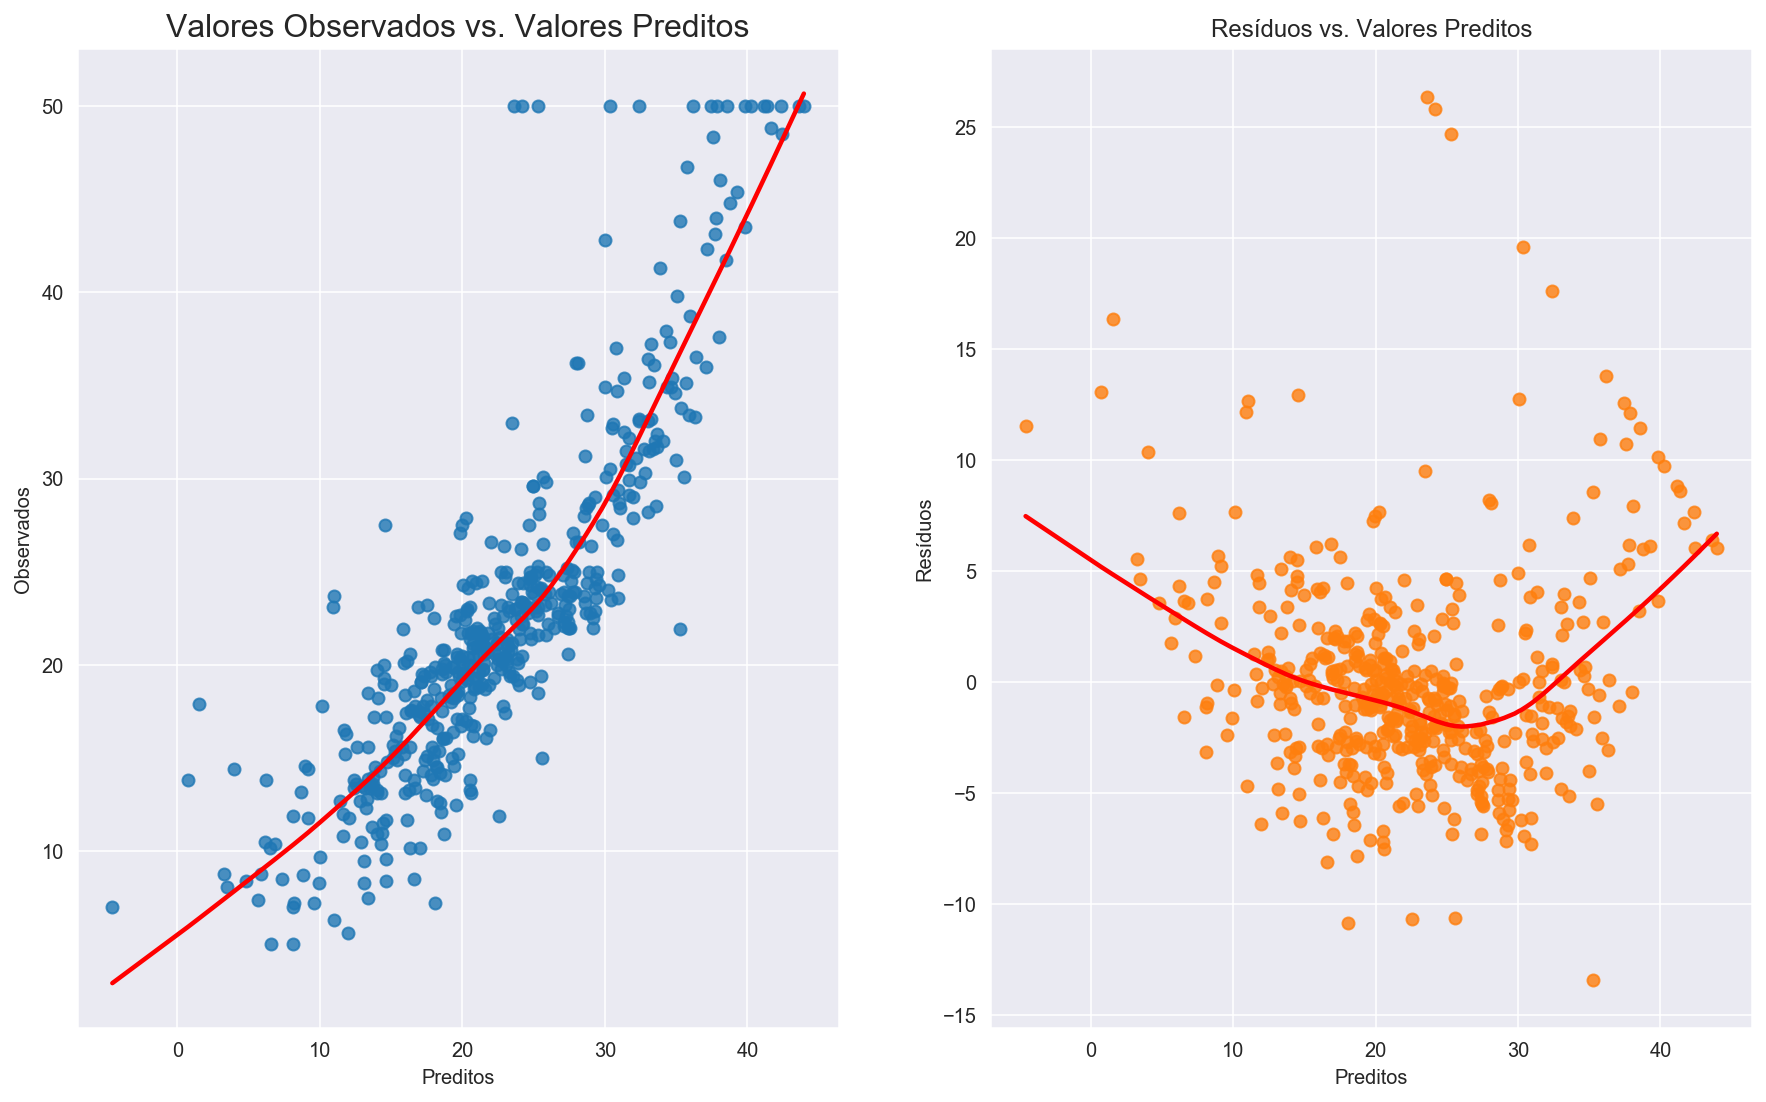

In [11]:
linearity_test(lin_reg, y)

- Verifica-se neste caso que a hipótese de linearidade não é respeitada

# ADICIONAR SOLUÇÕES

### Verificar se a média dos resíduos é zero:

In [12]:
lin_reg.resid.mean()

-3.3929819867200436e-14

# VIF (Variance Inflation Factor)

https://ibape-nacional.com.br/biblioteca/wp-content/uploads/2017/08/025.pdf

A multicolinearidade aumenta os erros padrão dos coeficientes. O aumento dos erros padrão, por sua vez, significa que os coeficientes para algumas variáveis independentes podem não ser significativamente diferentes de 0. Em outras palavras, ao super-inflacionar os erros padrão, a multicolinearidade torna algumas variáveis estatisticamente insignificantes quando deveriam ser significativas. Sem multicolinearidade (e, portanto, com erros padrão mais baixos), esses coeficientes poderiam ser significativos.
https://blog.minitab.com/pt/basta-lidando-com-a-multicolinearidade-na-analise-de-regressao

- A função que permite o cálculo do fator de inflação da variância possui a seguinte sintaxe:

<center> statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx) </center>

- Em que exog são as variáveis exógenas, e exog_idx o índice de cada variável exógena da Matriz de Design. 

- Lembrando que uma variável exógena é uma variável que é determinada fora do modelo e não pelo modelo.
https://en.wikipedia.org/wiki/Exogenous_and_endogenous_variables

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Vetor com o valor de VIF para cada um dos vetores colunas de variáveis exógenas supostamente independentes do modelo
vif = [variance_inflation_factor(X_constante.values, i) for i in range(X_constante.shape[1])]

#vif[1:] porque a primeira coluna é em relação a intersecção
vifdataframe = pd.DataFrame({'vif': vif[1:]}, index = X.columns).T; vifdataframe

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.787705,2.298257,3.949246,4.388775,1.931865,3.092832,3.954961,7.397844,8.876233,1.783302,1.344971,2.931101


##### Tão bem explicado que eu não vou nem traduzir
- To deal with multicollinearity we should iteratively remove features with high values of VIF. A rule of thumb for removal could be VIF larger than 10 (5 is also common). Another possible solution is to use PCA to reduce features to a smaller set of uncorrelated components.
Tip: we can also look at the correlation matrix of features to identify dependencies between them.


# Verificação de Homocedasticidade

In [20]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
import numpy as np
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0,9.0)

In [21]:
def homocedasticity_test(model):
    '''
    Função para testar a homocedasticidade dos resíduos em um modelo de regressão linear
    A função plota o gráfico dos resíduos padronizados vs valores preditos e executa os testes de Breusch-Pragan e Goldferb-Quandt
    
    Args:
    *model:          
    '''
    
    #Cálculos
    fitted_vals = model.predict()
    residuos = model.resid
    residuos_padronizados = model.get_influence().resid_studentized_internal
    
    #Gráficos
    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x = fitted_vals, y=residuos, lowess= True, ax = ax[0], line_kws = {'color':'red'})
    ax[0].set_title('Resíduos vs Valores preditos', fontsize = 16)
    ax[0].set(xlabel = 'Valores preditos', ylabel = 'Resíduos')
    
    sns.regplot(x = fitted_vals, y=np.sqrt(np.abs(residuos_padronizados)), lowess=True, ax = ax[1], line_kws = {'color':'red'})
    ax[1].set_title('Raiz dos resíduos padronizados absolutos vs Valores preditos', fontsize = 16)
    ax[1].set(xlabel = 'Valores preditos', ylabel = 'Raiz dos resíduos padronizados absolutos')
    
    # Testes de hipótese de homocedasticidade
    #Teste de Breusch-Pragan 
    bp_test = pd.DataFrame(het_breuschpagan(residuos, model.model.exog), 
                                                columns = ['value'],
                                                index = ['Lagrange Multiplier statistic','p-value','f-value','f p-vale']) 
    #model.model.exog retorna as variáveis exógenas utilizadas no treinamento do modelo
    
    # Teste de Goldfeld-Quandt 
    gq_test = pd.DataFrame(het_goldfeldquandt(residuos, model.model.exog)[:-1],
                          columns = ['value'],
                          index = ['F statistic','p-value'])
    
    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')
    
    
    

- Neste caso rejeitamos a hipótese nula então e os resíduos não apresentam homocedasticidade


 Breusch-Pagan test ----
                                      value
Lagrange Multiplier statistic  6.028613e+01
p-value                        2.001794e-08
f-value                        5.556828e+00
f p-vale                       5.935449e-09

 Goldfeld-Quandt test ----
                    value
F statistic  2.620956e+00
p-value      1.251137e-13

 Residuals plots ----


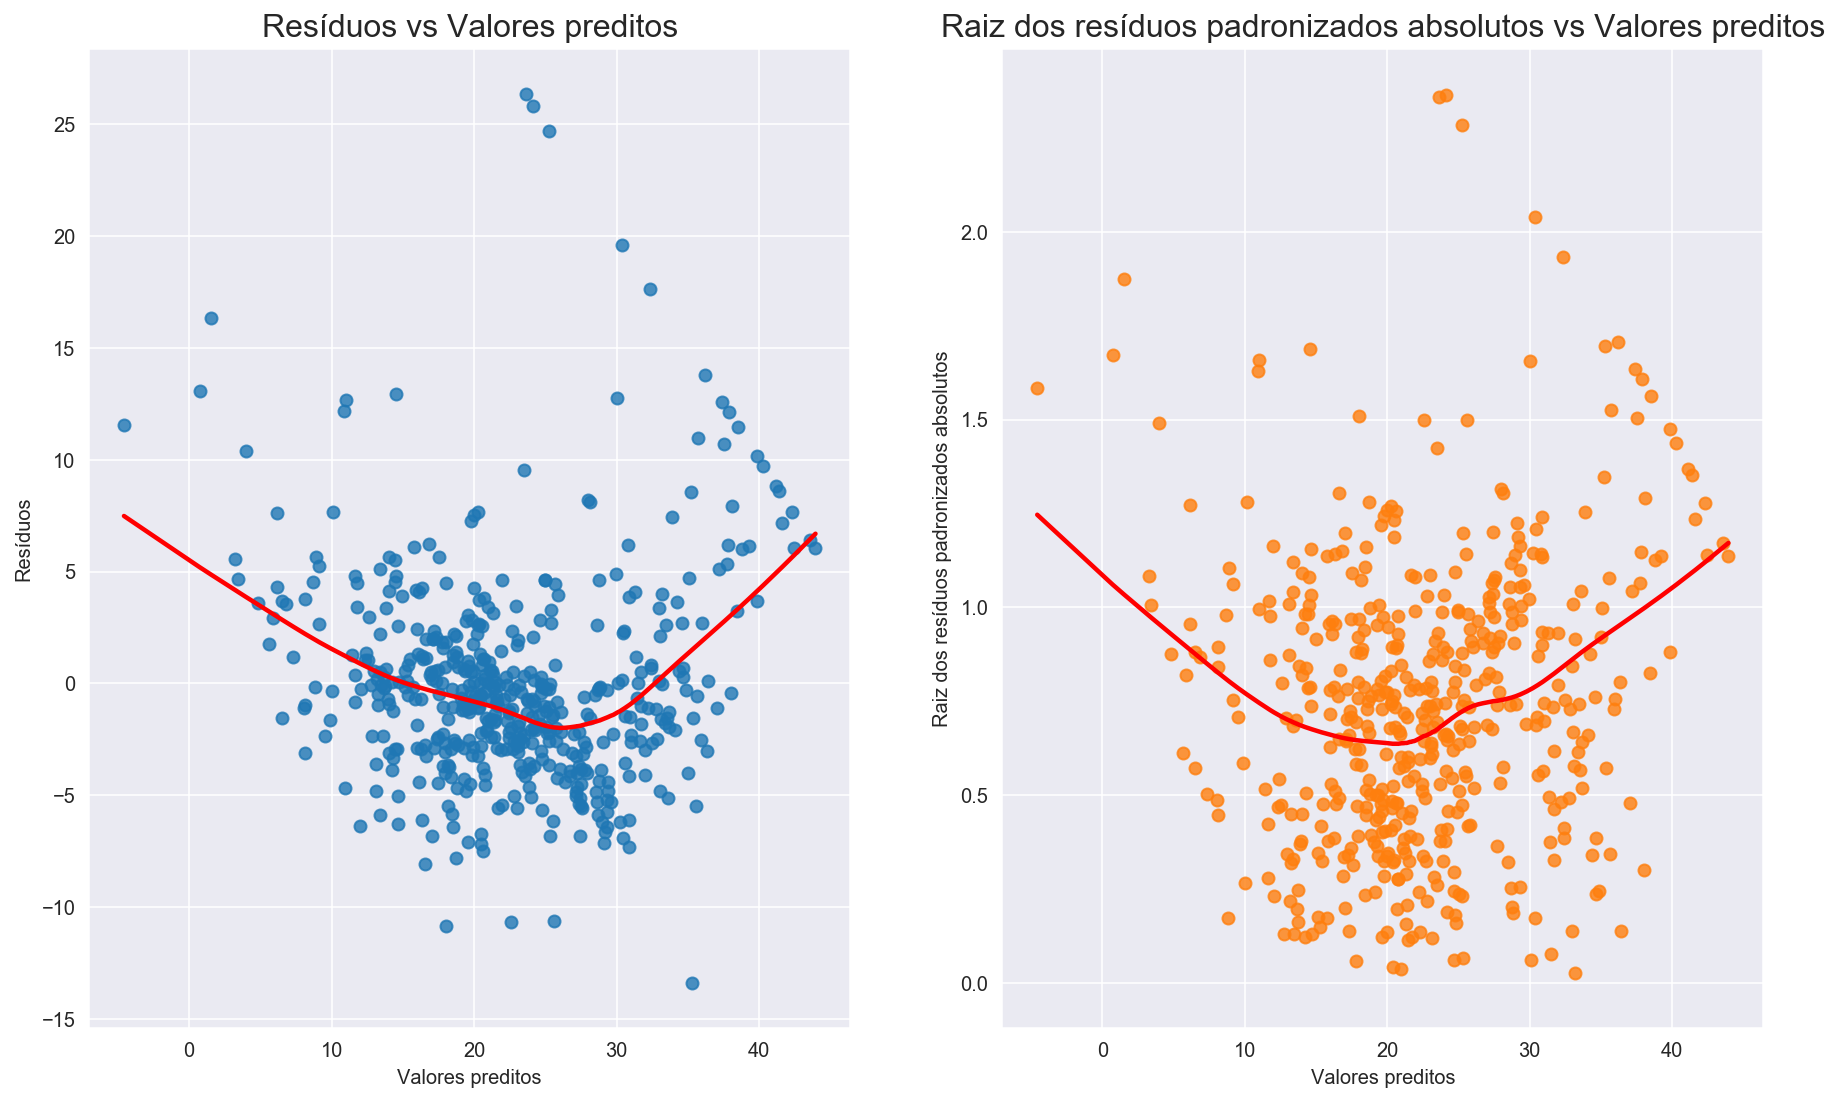

In [22]:
homocedasticity_test(lin_reg)

# Covariância nula dos resíduos
- $Cov(e_1, e_2, ... , e_p) = 0$

- Na regressão linear ou não linear, supõe-se que os resíduos sejam independentes (não correlacionados a) uns dos outros. Se a suposição de independência for violada, alguns resultados de ajuste do modelo podem não ser confiáveis. Por exemplo, a correlação positiva entre os termos de erro tende a inflar os valores-t de coeficientes, fazendo com que as preditoras pareçam significativas quando elas podem não ser.
https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/residuals-and-residual-plots/detect-autocorrelation-in-residuals/#:~:text=Uma%20autocorrela%C3%A7%C3%A3o%20negativa%20%C3%A9%20identificada,processo%20autorregressivo%20de%20primeira%20ordem.

### Autocorrelation Function (ACT)
#### O que é o lag? 
-O lag é o período de tempo que separa os dados que são ordenados no tempo. O Minitab exibe lags que estão em múltiplos de 12. O lag é usado para calcular o coeficiente de autocorrelação parcial.

C:\Users\vitor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


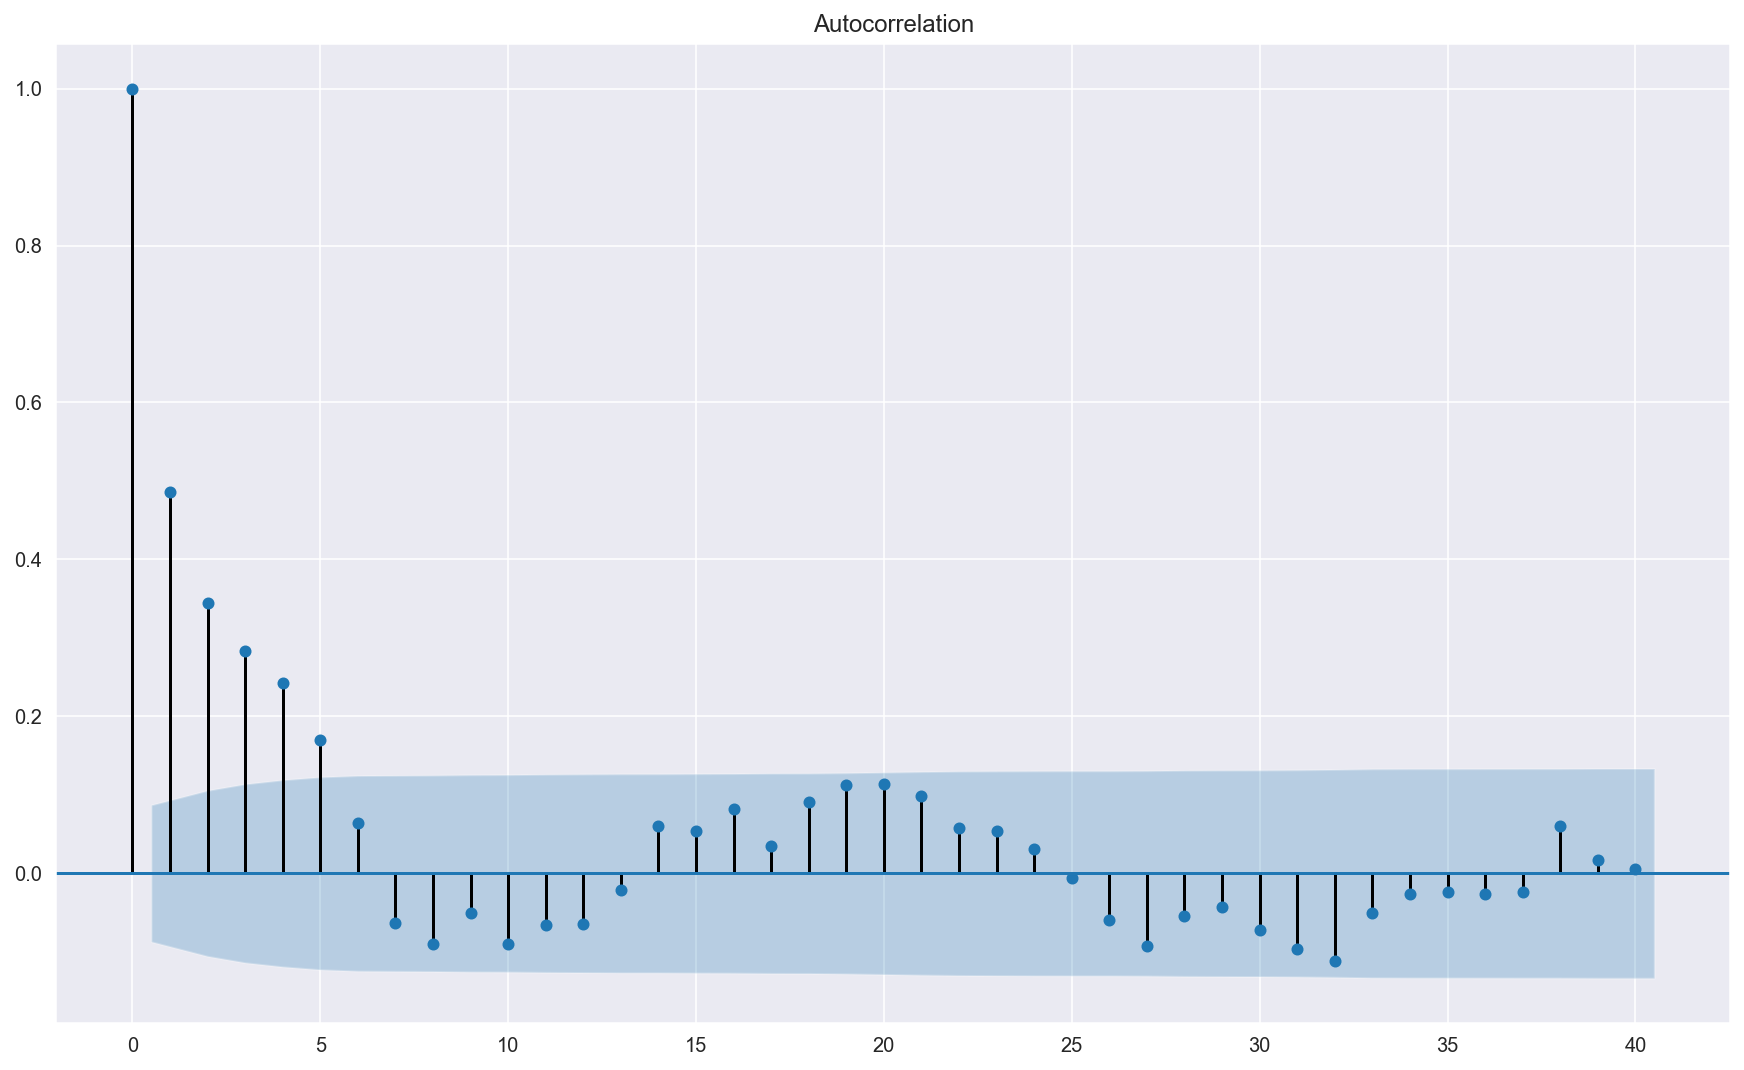

In [25]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags = 40, alpha = 0.05)
acf.show()

- Some notes on the Durbin-Watson test:
- the test statistic always has a value between 0 and 4
- value of 2 means that there is no autocorrelation in the sample
- values < 2 indicate positive autocorrelation, values > 2 negative one.

- Continuar